In [99]:
!pip install statsmodels
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use('ggplot')
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [98]:
UHD = pd.read_csv('./USA_Housing.csv')

In [64]:
UHD.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [65]:
UHD.shape

(5000, 7)

In [66]:
UHD.isnull().sum() # 결측치

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [67]:
UHD.info() # 데이터타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [68]:
UHD.describe() #

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [69]:
num_Address = UHD['Address'].unique()
print(len(num_Address))
num_Address

5000


array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [70]:
UHD['Price'].describe() # 가격

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

<AxesSubplot:>

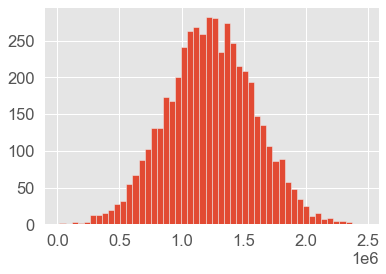

In [71]:
UHD['Price'].hist(bins=50) # 가격 분포

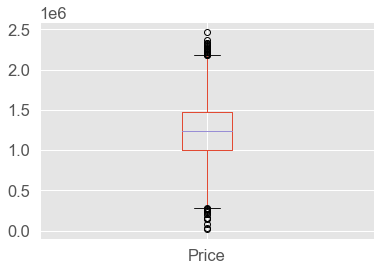

In [72]:
UHD.boxplot(column=['Price'])
plt.show() 

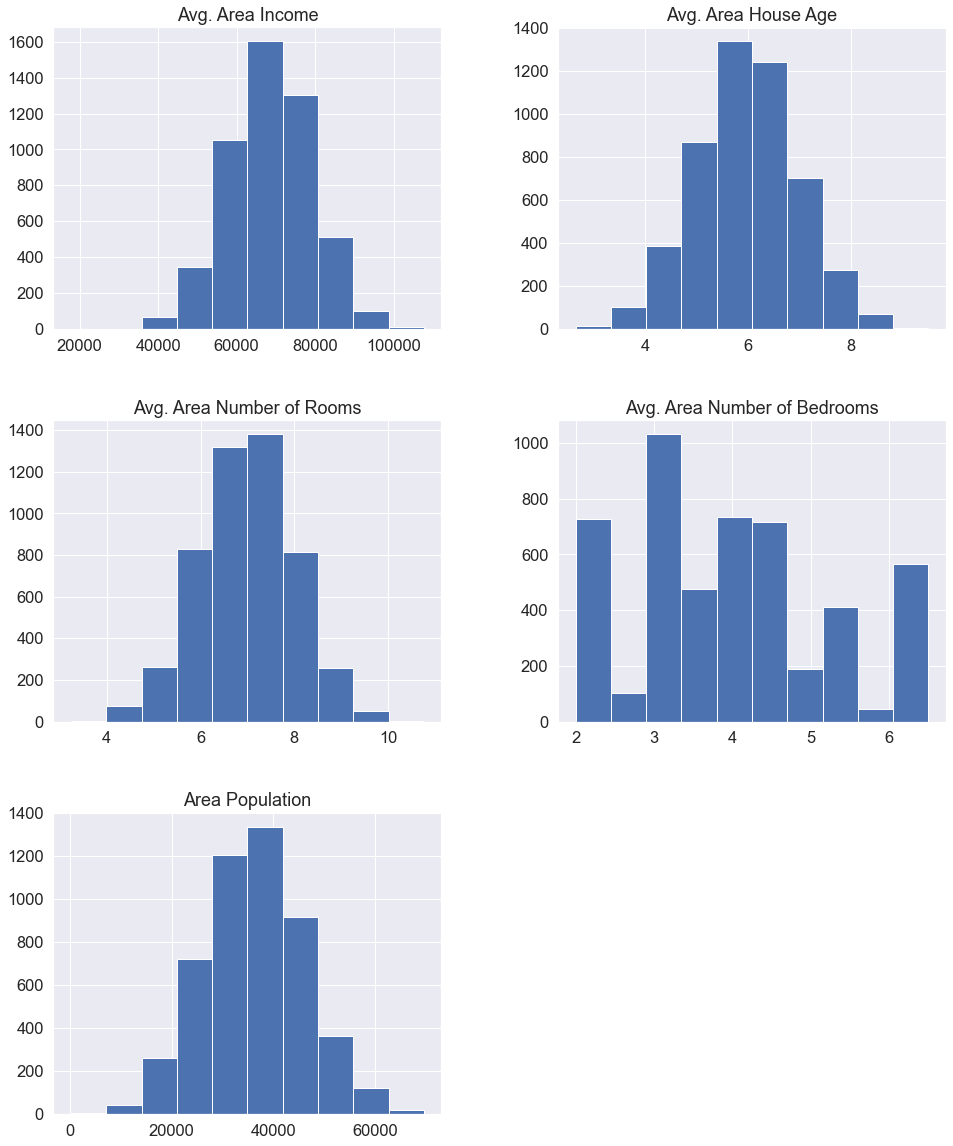

In [78]:
numerical_columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

UHD[numerical_columns].hist(ax=ax)
plt.show()

In [79]:
cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

corr = UHD[cols].corr(method = 'pearson')
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


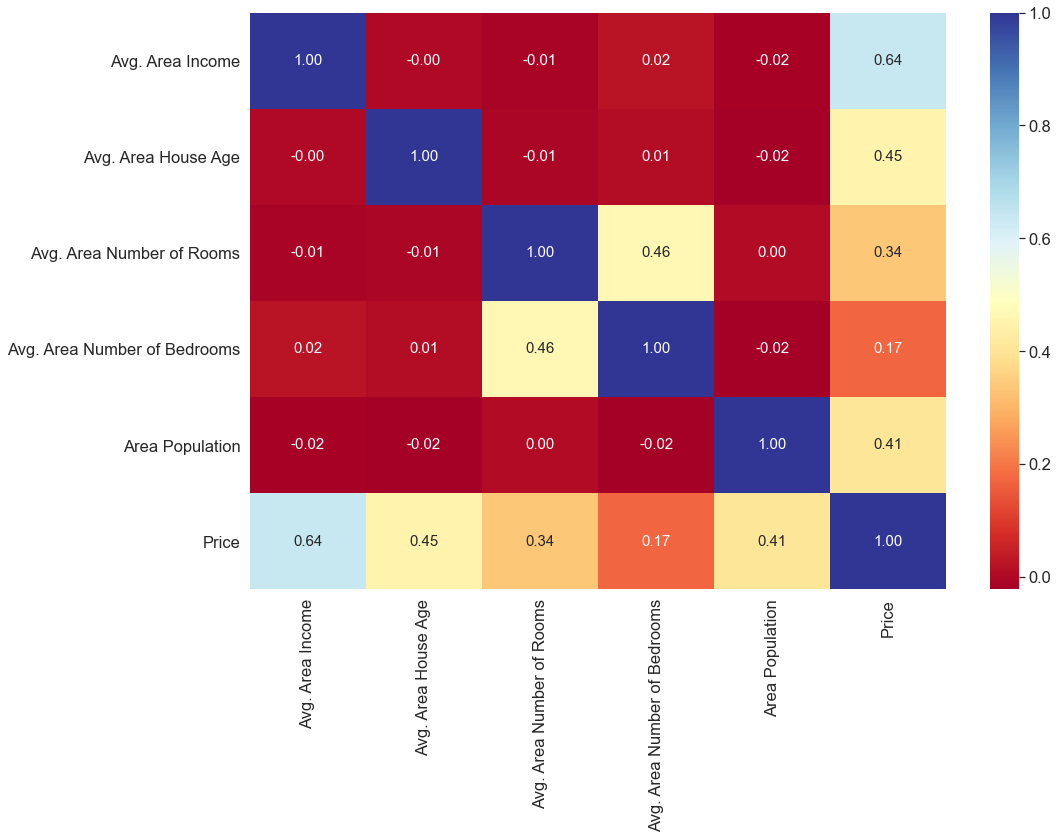

In [80]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

In [83]:
scaler = StandardScaler()  # 평균 0, 표준편차 1
scale_columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']
UHD[scale_columns] = scaler.fit_transform(UHD[scale_columns])

In [84]:
UHD.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843,USS Barnett\nFPO AP 44820
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518,USNS Raymond\nFPO AE 09386


In [85]:
UHD[numerical_columns].head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [86]:
X = UHD[numerical_columns]
y = UHD['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [87]:
X_train.shape, y_train.shape

((4000, 5), (4000,))

In [88]:
# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [89]:
print(lr.coef_)

[0.65395735 0.46324622 0.34404627 0.00539109 0.42585602]


In [90]:
coefs = pd.DataFrame(zip(UHD[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,Avg. Area Income,0.653957
1,Avg. Area House Age,0.463246
2,Avg. Area Number of Rooms,0.344046
3,Avg. Area Number of Bedrooms,0.005391
4,Area Population,0.425856


In [91]:
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
0,Avg. Area Income,0.653957
1,Avg. Area House Age,0.463246
4,Area Population,0.425856
2,Avg. Area Number of Rooms,0.344046
3,Avg. Area Number of Bedrooms,0.005391


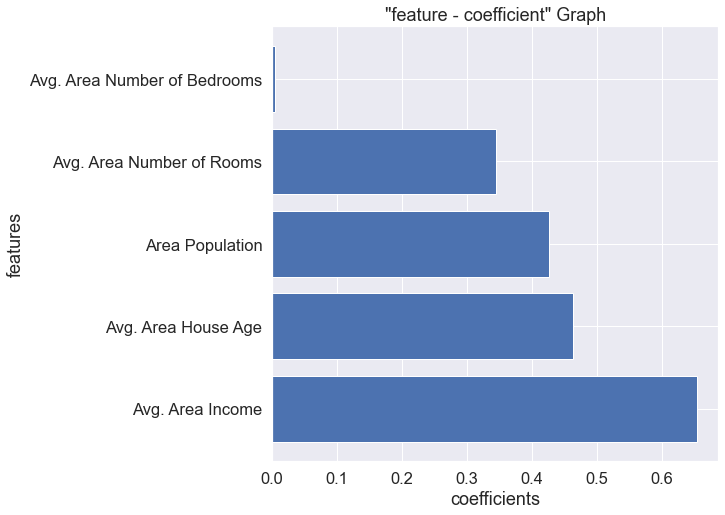

In [92]:
## coefficients 시각화

plt.figure(figsize = (8, 8))
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

In [100]:
X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     8826.
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        20:18:26   Log-Likelihood:                -657.80
No. Observations:                4000   AIC:                             1328.
Df Residuals:                    3994   BIC:                             1365.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0027      0.005      0.592      0.554      -0.006       0.012
Avg. Area Income                 0.6540      0.005    144.105      0.000       0.645       0.663
Avg. Area House Age              0.4632      0.004    103.010      0.000       0.454       0.472
Avg. Area Number of Rooms        0.3440      0.005     67.123      0.000       0.334       0.354
Avg. Area Number of Bedrooms     0.0054      0.005      1.059      0.290      -0.005       0.015
Area Population                  0.4259      0.005     94.202      0.000       0.417       0.435
==============================================================================
Omnibus:                        7.595   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.397
Skew:                           0.005   Prob(JB):                       0.0408
Kurtosis:                       2.804   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

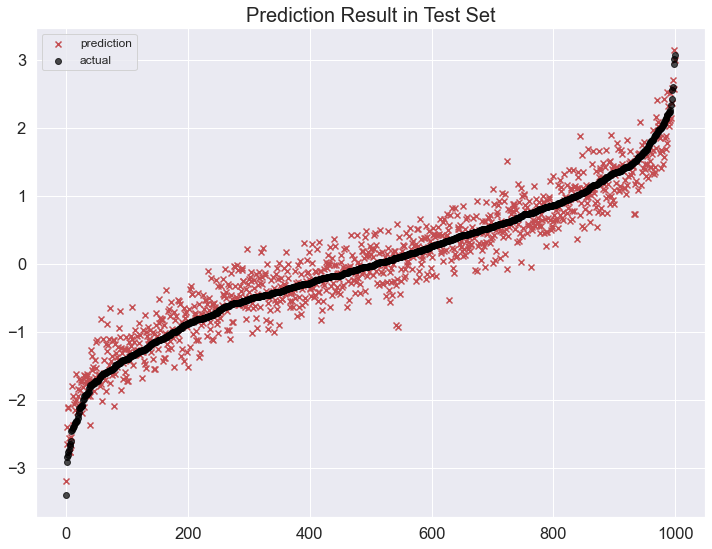

In [97]:
uhd = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
uhd = uhd.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(uhd.index, uhd['prediction'], marker='x', color='r')
plt.scatter(uhd.index, uhd['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()